# The Runge-Kutta method

Similar to the Euler's method, where the derivative of a function at the starting point is extrapolated to find the next point, the Runge-Kutta method refines the idea by extrapolating along several directions near the derivative of the starting point and then weight-averaging the result to find the next point. This often has a better accuracy compared to Euler's method.

Fourth-order Runge-Kutta approximates the next output of the function with a step-size $h$ like so:

$$
y_{n+1} = y_n + \frac{1}{6} k_1 + \frac{1}{3}k_2 + \frac{1}{3}k_3 + \frac{1}{6}k_4,
$$

where $k$'s are as follows:

$$
\begin{align*}
& k_1 = h f(x_n, y_n) \\
& k_2 = h f(x_n + 0.5 h, y_n + 0.5 k_1) \\
& k_3 = h f(x_n + 0.5 h, y_n + 0.5 k_2) \\
& k_4 = h f(x_n + h, y_n + k_3)
\end{align*}
$$

## Implementation

Following is the implementation of the fourth-order Runge-Kutta integrator.

In [4]:
class RungeKutta4:

    def integrate(self, f, x0, y0, xn, dx):
        x = x0
        y = y0
        n = int((xn - x0) / dx)
        xs = [x]
        ys = [y]

        for _ in range(1, n + 1):
            k1 = dx * f(x, y)
            k2 = dx * f(x + 0.5 * dx, y + 0.5 * k1)
            k3 = dx * f(x + 0.5 * dx, y + 0.5 * k2)
            k4 = dx * f(x + dx, y + k3)

            x = x + dx
            y = y + (k1 / 6.0 + k2 / 3.0 + k3 / 3.0 + k4 / 6.0)
            
            xs.append(x)
            ys.append(y)
        
        return xs, ys

We test the implementation by solving the differential equation $\frac{dy}{dx} = x^2$. We plot for comparison the analytical solution, Euler's method solution, and the Runge-Kutta implementation.

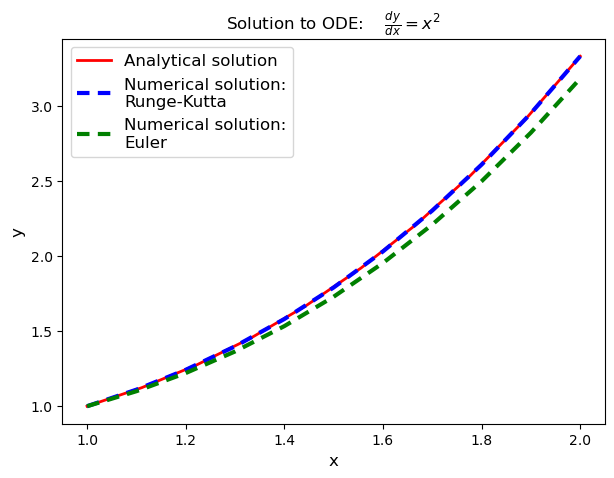

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from rungekutta import RungeKutta4
from euler import Euler


rk4_integrator = RungeKutta4()
euler_integrator = Euler()

def dydx(x, y):
    return x**2

def y_solved(x):
    # For initial y0 = 1, x0 = 1
    return x**3 / 3.0 + 2 / 3.0

x0 = 1.0
y0 = 1.0
xn = 2.0
dx = 0.1

xs_rk4, ys_rk4 = rk4_integrator.integrate(dydx, x0, y0, xn, dx)
xs_euler, ys_euler = euler_integrator.integrate(dydx, x0, y0, xn, dx)


plt.figure(figsize=(7,5))

analytic_xs = np.linspace(x0, xn, int((xn - x0) / dx))
plt.plot(analytic_xs, y_solved(analytic_xs), 
         label="Analytical solution",color="red", lw=2)

plt.plot(xs_rk4, ys_rk4, label="Numerical solution:\nRunge-Kutta", dashes=(3,2), color="blue",
        lw=3)
plt.plot(xs_euler, ys_euler, label="Numerical solution:\nEuler", dashes=(3,2), color="green",
        lw=3)

plt.legend(loc="best", fontsize=12)
plt.title(r"Solution to ODE: $\quad\frac{dy}{dx}=x^2$")
plt.xlabel("x", fontsize=12)
plt.ylabel("y", fontsize=12)
plt.show()


References:
1) "Numerical Recipes: The Art of Scientific Computing" by W. H. Press, S. A. Teukolsky, W. T. Vetterling, and B. P. Flannery